In [7]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns',None)

In [8]:
flights = pd.read_csv('flights.csv', low_memory=False)
flights.shape

(5819079, 31)

In [9]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [11]:
flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
        'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',  'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

In [12]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [14]:
flights[flights["ARRIVAL_DELAY"].isna()]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
32,2015,1,1,4,AS,136,ANC,SEA,135,NaN,NaN,600,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
42,2015,1,1,4,AA,2459,PHX,DFW,200,NaN,NaN,500,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
68,2015,1,1,4,OO,5254,MAF,IAH,510,NaN,NaN,637,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
82,2015,1,1,4,MQ,2859,SGF,DFW,525,NaN,NaN,700,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
90,2015,1,1,4,OO,5460,RDD,SFO,530,NaN,NaN,700,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818157,2015,12,31,4,UA,222,SFO,LAX,2000,NaN,NaN,2136,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818160,2015,12,31,4,WN,5296,MDW,ABQ,2000,2013.0,13.0,2215,2325.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
5818318,2015,12,31,4,AA,2245,MIA,SAN,2019,NaN,NaN,2256,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818777,2015,12,31,4,NK,416,FLL,IAG,2155,NaN,NaN,50,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN


In [15]:
na_values =flights[flights['AIR_SYSTEM_DELAY'].isna() & flights['SECURITY_DELAY'].isna() & flights['AIRLINE_DELAY'].isna()  & flights['LATE_AIRCRAFT_DELAY'].isna() & flights['WEATHER_DELAY'].isna()]
na_values.shape


(4755640, 22)

In [18]:
conda install matplotlib


Retrieving notices: ...working... done
Note: you may need to restart the kernel to use updated packages.

Channels:
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\hp\miniconda3\envs\ML

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       h2bbff1b_8          19 KB
    brotli-bin-1.0.9           |       h2bbff1b_8          29 KB
    contourpy-1.2.0            |  py311h59b6b97_0         218 KB
    cycler-0.11.0              |     pyhd3eb1b0_0          12 KB
    fonttools-4.51.0           |  py311h2bbff1b_0         2.6 MB
    freetype-2.12.1            |       ha860e81_0         490 KB
    kiwisolver-1.4.4           |  py311hd77b12b_0          55 KB
    lcms2-2.12                 |       h83e58a3_0         454 KB
    lerc-3.0   

array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>],
       [<Axes: title={'center': 'FLIGHT_NUMBER'}>,
        <Axes: title={'center': 'SCHEDULED_DEPARTURE'}>,
        <Axes: title={'center': 'DEPARTURE_TIME'}>,
        <Axes: title={'center': 'DEPARTURE_DELAY'}>],
       [<Axes: title={'center': 'SCHEDULED_ARRIVAL'}>,
        <Axes: title={'center': 'ARRIVAL_TIME'}>,
        <Axes: title={'center': 'ARRIVAL_DELAY'}>,
        <Axes: title={'center': 'DIVERTED'}>],
       [<Axes: title={'center': 'CANCELLED'}>,
        <Axes: title={'center': 'AIR_SYSTEM_DELAY'}>,
        <Axes: title={'center': 'SECURITY_DELAY'}>,
        <Axes: title={'center': 'AIRLINE_DELAY'}>],
       [<Axes: title={'center': 'LATE_AIRCRAFT_DELAY'}>,
        <Axes: title={'center': 'WEATHER_DELAY'}>, <Axes: >, <Axes: >]],
      dtype=object)

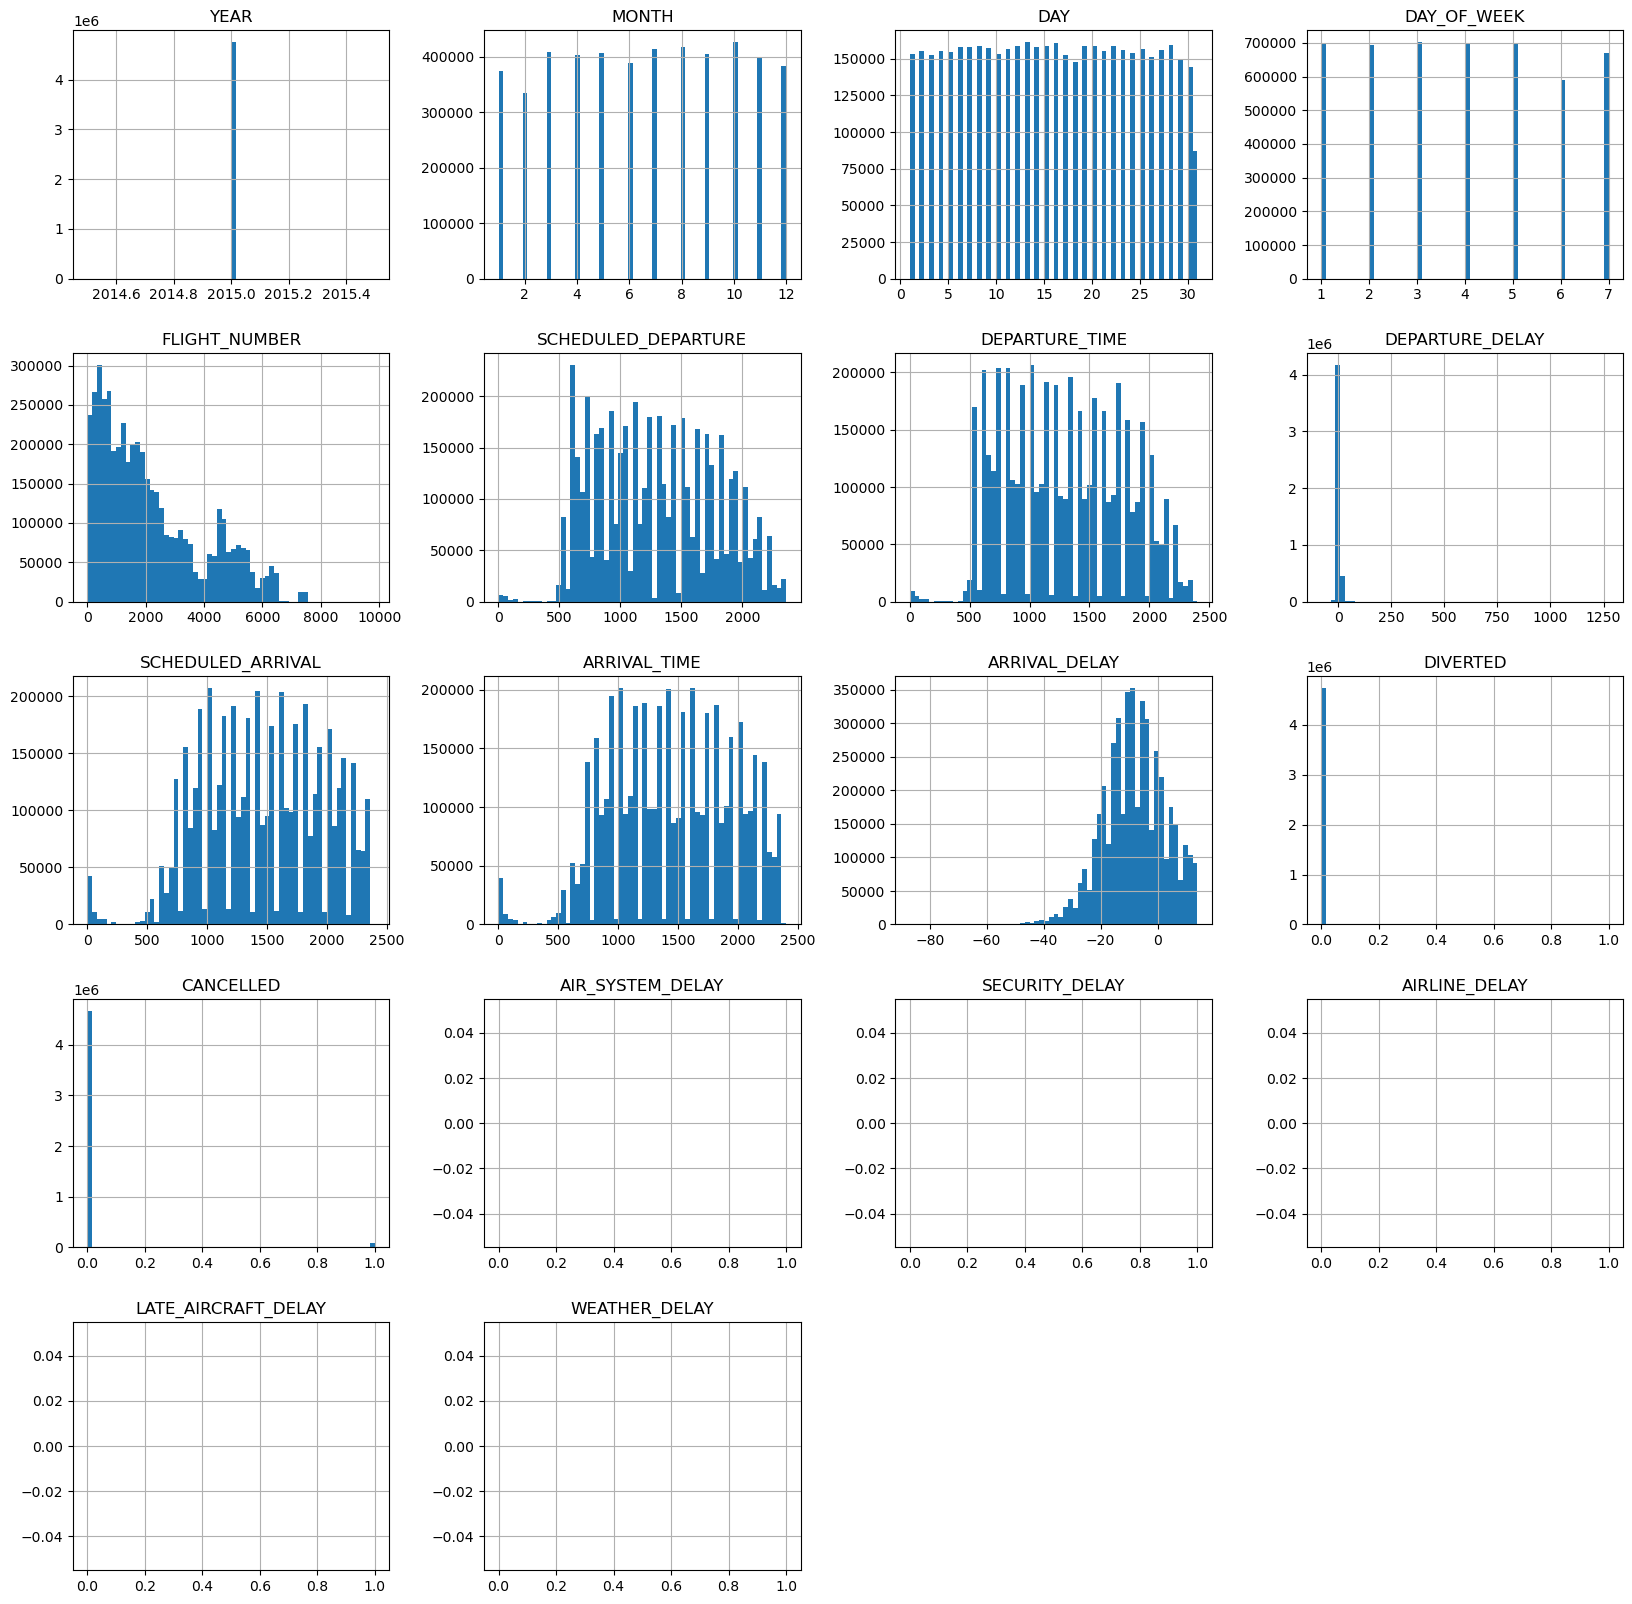

In [19]:
na_values.hist(bins=60, figsize=(20, 20))

In [31]:
na_values[na_values['ARRIVAL_DELAY']>13]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
94,2015,1,1,4,UA,1012,IAD,IAH,535,541.0,6.0,802,816.0,14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
109,2015,1,1,4,EV,3268,ATL,IAD,540,556.0,16.0,725,739.0,14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
181,2015,1,1,4,UA,422,RNO,DEN,600,557.0,-3.0,910,924.0,14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
204,2015,1,1,4,AA,196,MIA,PHL,600,604.0,4.0,844,858.0,14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
490,2015,1,1,4,F9,582,SLC,DEN,615,617.0,2.0,747,801.0,14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817972,2015,12,31,4,DL,188,DTW,LGA,1940,2009.0,29.0,2126,2140.0,14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5818194,2015,12,31,4,NK,380,FLL,DTW,2005,2029.0,24.0,2305,2319.0,14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5818308,2015,12,31,4,B6,448,LGB,OAK,2015,2033.0,18.0,2132,2146.0,14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5818644,2015,12,31,4,B6,1206,PDX,JFK,2120,2114.0,-6.0,518,532.0,14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
arrival_na =flights[flights['ARRIVAL_DELAY'].isna()]
arrival_na

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
32,2015,1,1,4,AS,136,ANC,SEA,135,NaN,NaN,600,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
42,2015,1,1,4,AA,2459,PHX,DFW,200,NaN,NaN,500,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
68,2015,1,1,4,OO,5254,MAF,IAH,510,NaN,NaN,637,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
82,2015,1,1,4,MQ,2859,SGF,DFW,525,NaN,NaN,700,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
90,2015,1,1,4,OO,5460,RDD,SFO,530,NaN,NaN,700,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818157,2015,12,31,4,UA,222,SFO,LAX,2000,NaN,NaN,2136,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818160,2015,12,31,4,WN,5296,MDW,ABQ,2000,2013.0,13.0,2215,2325.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
5818318,2015,12,31,4,AA,2245,MIA,SAN,2019,NaN,NaN,2256,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818777,2015,12,31,4,NK,416,FLL,IAG,2155,NaN,NaN,50,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN


In [36]:
arrival_na[arrival_na['CANCELLED']==1]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
32,2015,1,1,4,AS,136,ANC,SEA,135,NaN,NaN,600,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
42,2015,1,1,4,AA,2459,PHX,DFW,200,NaN,NaN,500,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
68,2015,1,1,4,OO,5254,MAF,IAH,510,NaN,NaN,637,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
82,2015,1,1,4,MQ,2859,SGF,DFW,525,NaN,NaN,700,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
90,2015,1,1,4,OO,5460,RDD,SFO,530,NaN,NaN,700,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818090,2015,12,31,4,UA,1789,IAH,TPA,1955,NaN,NaN,2300,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818157,2015,12,31,4,UA,222,SFO,LAX,2000,NaN,NaN,2136,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818318,2015,12,31,4,AA,2245,MIA,SAN,2019,NaN,NaN,2256,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818777,2015,12,31,4,NK,416,FLL,IAG,2155,NaN,NaN,50,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN


In [37]:
arrival_na['CANCELLED'].value_counts()

CANCELLED
1    89884
0    15187
Name: count, dtype: int64

In [39]:
flights = flights[~flights['ARRIVAL_DELAY'].isna()]
flights.shape

(5714008, 22)

In [41]:
flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5714008
AIR_SYSTEM_DELAY       4650569
SECURITY_DELAY         4650569
AIRLINE_DELAY          4650569
LATE_AIRCRAFT_DELAY    4650569
WEATHER_DELAY          4650569
dtype: int64

In [43]:
flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']] = flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].fillna(0)
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
1,2015,1,1,4,AA,2336,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
2,2015,1,1,4,US,840,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
3,2015,1,1,4,AA,258,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
4,2015,1,1,4,AS,135,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,LAX,BOS,2359,2355.0,-4.0,819,753.0,-26.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
5819075,2015,12,31,4,B6,745,JFK,PSE,2359,2355.0,-4.0,446,430.0,-16.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
5819076,2015,12,31,4,B6,1503,JFK,SJU,2359,2350.0,-9.0,440,432.0,-8.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
5819077,2015,12,31,4,B6,333,MCO,SJU,2359,2353.0,-6.0,340,330.0,-10.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0


array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>],
       [<Axes: title={'center': 'FLIGHT_NUMBER'}>,
        <Axes: title={'center': 'SCHEDULED_DEPARTURE'}>,
        <Axes: title={'center': 'DEPARTURE_TIME'}>,
        <Axes: title={'center': 'DEPARTURE_DELAY'}>],
       [<Axes: title={'center': 'SCHEDULED_ARRIVAL'}>,
        <Axes: title={'center': 'ARRIVAL_TIME'}>,
        <Axes: title={'center': 'ARRIVAL_DELAY'}>,
        <Axes: title={'center': 'DIVERTED'}>],
       [<Axes: title={'center': 'CANCELLED'}>,
        <Axes: title={'center': 'AIR_SYSTEM_DELAY'}>,
        <Axes: title={'center': 'SECURITY_DELAY'}>,
        <Axes: title={'center': 'AIRLINE_DELAY'}>],
       [<Axes: title={'center': 'LATE_AIRCRAFT_DELAY'}>,
        <Axes: title={'center': 'WEATHER_DELAY'}>, <Axes: >, <Axes: >]],
      dtype=object)

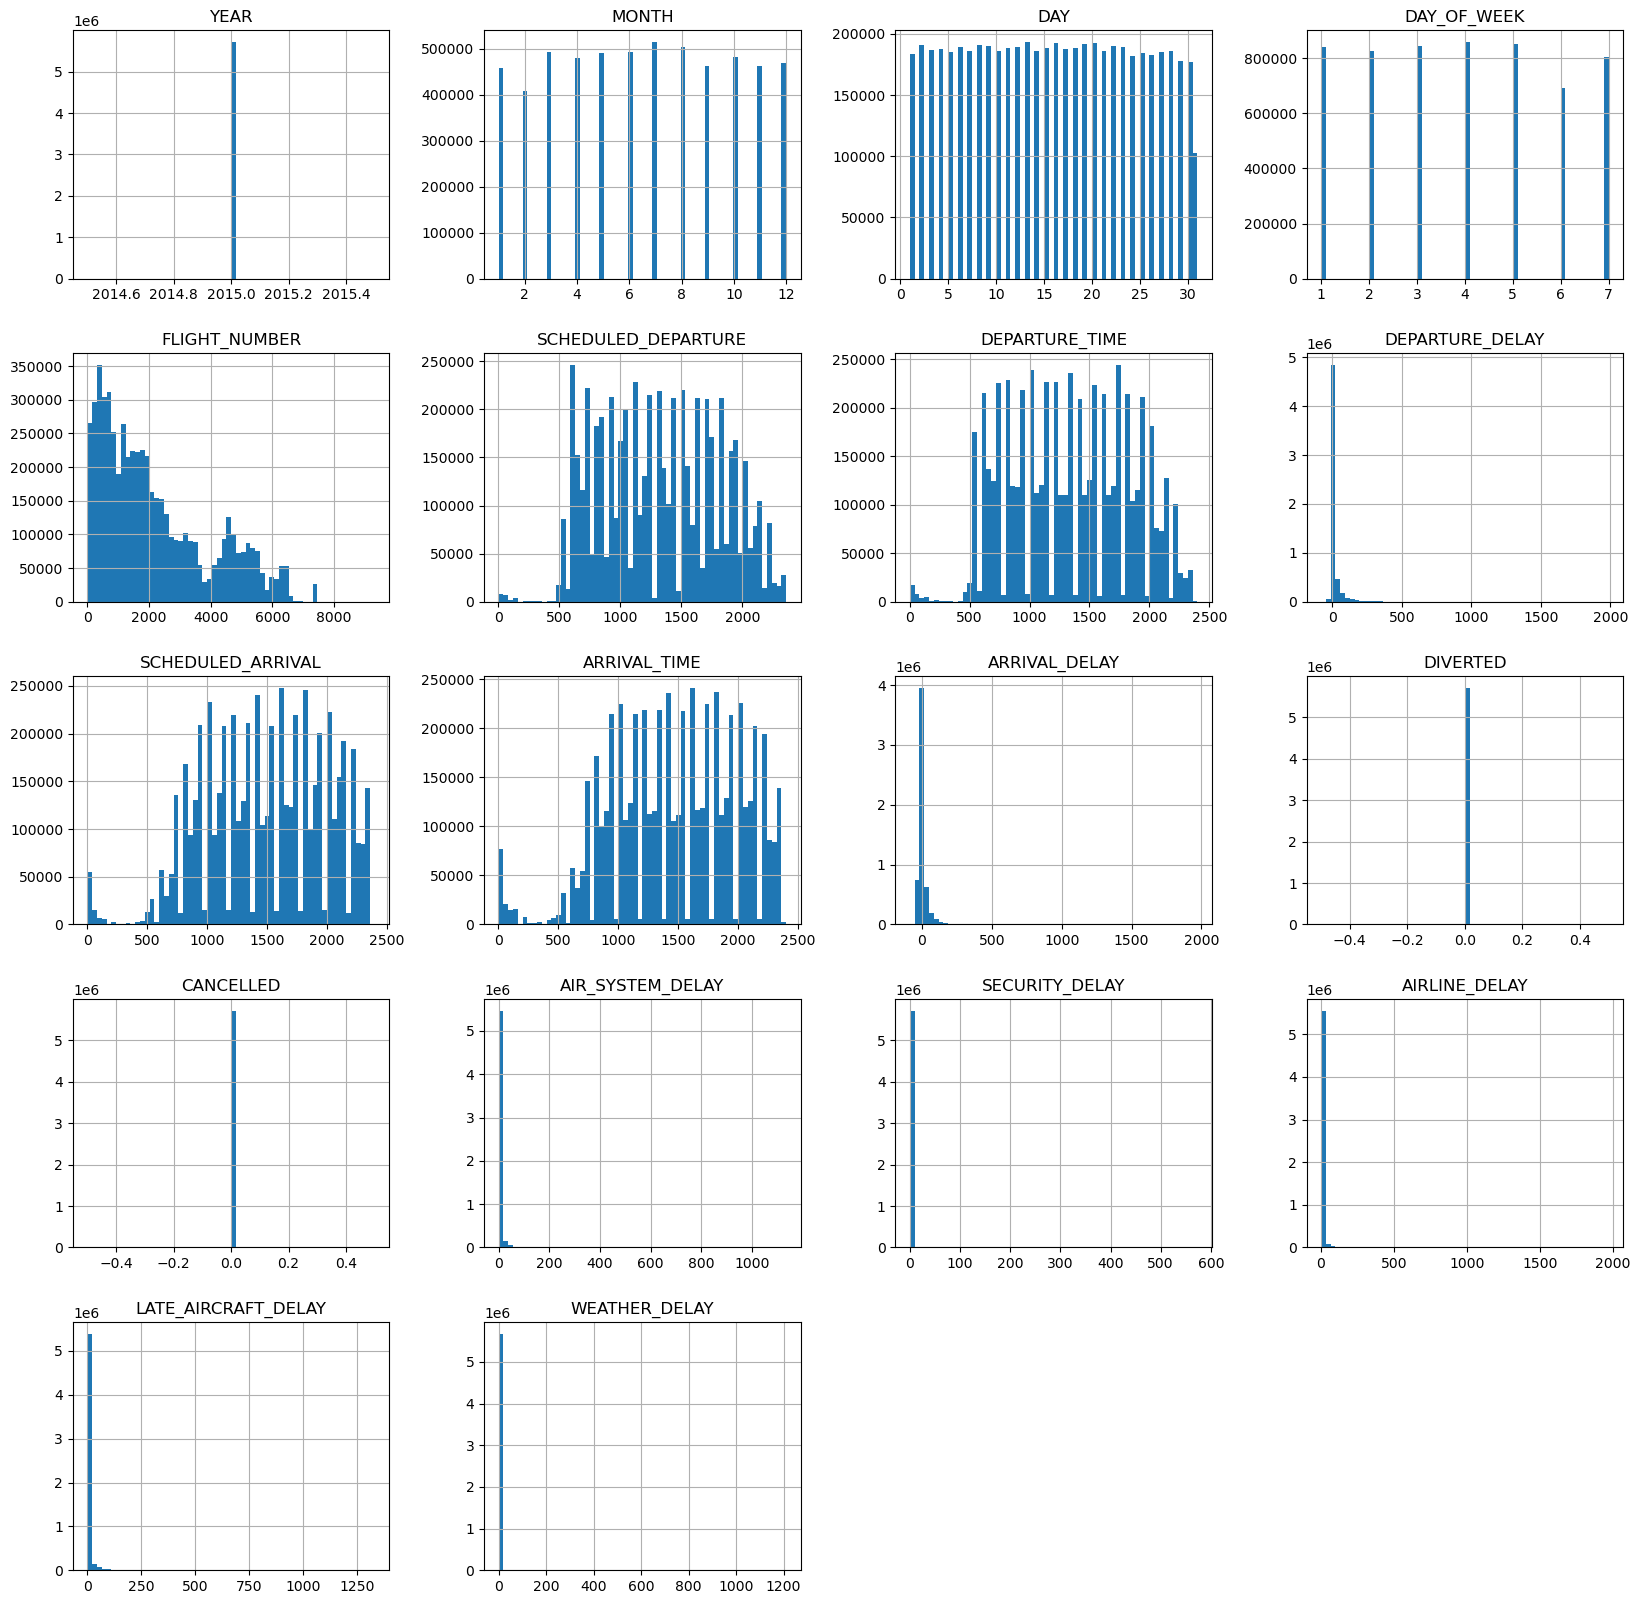

In [44]:
flights.hist(bins=60, figsize=(20, 20))

In [47]:
flights[flights['ARRIVAL_DELAY']>105]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
106,2015,1,1,4,DL,824,PHX,DTW,540,808.0,148.0,1123,1331.0,128.0,0,0,NaN,0.0,0.0,0.0,0.0,128.0
165,2015,1,1,4,EV,5976,BUF,EWR,555,928.0,213.0,715,1101.0,226.0,0,0,NaN,13.0,0.0,0.0,0.0,213.0
171,2015,1,1,4,OO,5547,ONT,DEN,559,758.0,119.0,920,1116.0,116.0,0,0,NaN,0.0,0.0,0.0,0.0,116.0
174,2015,1,1,4,UA,247,PHX,IAH,600,751.0,111.0,928,1131.0,123.0,0,0,NaN,12.0,0.0,0.0,0.0,111.0
262,2015,1,1,4,DL,1205,PHX,ATL,600,804.0,124.0,1127,1314.0,107.0,0,0,NaN,0.0,0.0,0.0,0.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818836,2015,12,31,4,DL,1358,ATL,SAV,2210,142.0,212.0,2309,233.0,204.0,0,0,NaN,0.0,0.0,9.0,195.0,0.0
5818837,2015,12,31,4,DL,2328,ATL,CHA,2210,657.0,527.0,2256,744.0,528.0,0,0,NaN,1.0,0.0,236.0,291.0,0.0
5818876,2015,12,31,4,F9,427,ATL,DEN,2225,52.0,147.0,10,209.0,119.0,0,0,NaN,0.0,0.0,0.0,119.0,0.0
5819008,2015,12,31,4,AA,645,OGG,PHX,2330,240.0,190.0,803,1157.0,234.0,0,0,NaN,44.0,0.0,190.0,0.0,0.0


In [48]:
flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [49]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [50]:
flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

In [51]:
flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
SCHEDULED_ARRIVAL        int64
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [52]:
flights['all_delay']=  flights[[ 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].sum(axis=1)
flights

C:\Users\hp\AppData\Local\Temp\ipykernel_4996\73974332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['all_delay']=  flights[[ 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,all_delay
0,2015,1,1,4,AS,98,ANC,SEA,5,430,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,1,1,4,AA,2336,LAX,PBI,10,750,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,1,1,4,US,840,SFO,CLT,20,806,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,1,1,4,AA,258,LAX,MIA,20,805,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,1,4,AS,135,SEA,ANC,25,320,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,LAX,BOS,2359,819,0.0,0.0,0.0,0.0,0.0,0.0
5819075,2015,12,31,4,B6,745,JFK,PSE,2359,446,0.0,0.0,0.0,0.0,0.0,0.0
5819076,2015,12,31,4,B6,1503,JFK,SJU,2359,440,0.0,0.0,0.0,0.0,0.0,0.0
5819077,2015,12,31,4,B6,333,MCO,SJU,2359,340,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
flights['delay_reason'] = np.where(flights['all_delay']>0, flights[[ 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].idxmax(axis=1),'NO_DELAY')

C:\Users\hp\AppData\Local\Temp\ipykernel_4996\1536781784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['delay_reason'] = np.where(flights['all_delay']>0, flights[[ 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',


In [56]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,all_delay,delay_reason
0,2015,1,1,4,AS,98,ANC,SEA,5,430,0.0,0.0,0.0,0.0,0.0,0.0,NO_DELAY
1,2015,1,1,4,AA,2336,LAX,PBI,10,750,0.0,0.0,0.0,0.0,0.0,0.0,NO_DELAY
2,2015,1,1,4,US,840,SFO,CLT,20,806,0.0,0.0,0.0,0.0,0.0,0.0,NO_DELAY
3,2015,1,1,4,AA,258,LAX,MIA,20,805,0.0,0.0,0.0,0.0,0.0,0.0,NO_DELAY
4,2015,1,1,4,AS,135,SEA,ANC,25,320,0.0,0.0,0.0,0.0,0.0,0.0,NO_DELAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,LAX,BOS,2359,819,0.0,0.0,0.0,0.0,0.0,0.0,NO_DELAY
5819075,2015,12,31,4,B6,745,JFK,PSE,2359,446,0.0,0.0,0.0,0.0,0.0,0.0,NO_DELAY
5819076,2015,12,31,4,B6,1503,JFK,SJU,2359,440,0.0,0.0,0.0,0.0,0.0,0.0,NO_DELAY
5819077,2015,12,31,4,B6,333,MCO,SJU,2359,340,0.0,0.0,0.0,0.0,0.0,0.0,NO_DELAY


In [57]:
flights['delay_reason'].value_counts()

delay_reason
NO_DELAY               4650569
LATE_AIRCRAFT_DELAY     410647
AIRLINE_DELAY           311386
AIR_SYSTEM_DELAY        303784
WEATHER_DELAY            35711
SECURITY_DELAY            1911
Name: count, dtype: int64

In [72]:
flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'delay_reason']]

In [77]:
x_flight = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL']]

x_flight = pd.get_dummies(x_flight,columns=['AIRLINE'])

y_flight  = flights[['delay_reason']]

In [78]:
x_flight

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
0,2015,1,1,4,5,430,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,2015,1,1,4,10,750,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2015,1,1,4,20,806,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,2015,1,1,4,20,805,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2015,1,1,4,25,320,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,2359,819,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5819075,2015,12,31,4,2359,446,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5819076,2015,12,31,4,2359,440,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5819077,2015,12,31,4,2359,340,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [61]:
y_flight

,delay_reason
0,NO_DELAY
1,NO_DELAY
2,NO_DELAY
3,NO_DELAY
4,NO_DELAY
...,...
5819074,NO_DELAY
5819075,NO_DELAY
5819076,NO_DELAY
5819077,NO_DELAY
